In [1]:
import sys
sys.path.append("./auto_ts")

In [2]:
import auto_ts as AT

Running Auto Timeseries version: 0.0.19...Call by using:
        auto_ts.Auto_Timeseries(traindata, ts_column,
                            target, sep,  score_type='rmse', forecast_period=5,
                            time_interval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None, model_type='stats',
                            verbose=1)
    To run three models from Stats, ML and FB Prophet, set model_type='best'
To remove previous versions, perform 'pip uninstall auto_ts'
To get the latest version, perform "pip install auto_ts --no-cache-dir --ignore-installed"


In [3]:
import pandas as pd
import numpy as np

In [4]:
datapath = 'example_datasets/'
filename1 = 'Sales_and_Marketing.csv'

In [5]:
dft = pd.read_csv(datapath+filename1,index_col=None)
print(dft.shape)
dft.head(1)

(48, 3)


,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64


In [6]:
preds = [x for x in list(dft) if x not in ['Time Period']]
len(preds)

2

In [7]:
ts_column = 'Time Period'
sep = ','
target = 'Sales'
dft.isnull().sum()

Time Period          0
Sales                0
Marketing Expense    0
dtype: int64

In [9]:
train = dft[:40]
test = dft[40:]
print(train.shape, test.shape)
train.head()

(40, 3) (8, 3)


,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


In [10]:
score_type = 'rmse'
forecast_period = 5
timeinterval = 'Monthly'
non_seasonal_pdq = (3, 1, 3)
seasonality = True
seasonal_periods = 24

In [11]:
#dft[ts_column] = pd.to_datetime(dft[ts_column].map(lambda x: " 20".join(x.split("-"))))

In [12]:
#dft.to_csv(datapath+filename1,index=False)

Input is data frame. Performing Time Series Analysis
    Dataframe loaded successfully. Shape of data set = (40, 2)
    Target variable = Sales
Time Interval is given as Month

Running Facebook Prophet Model...
Preparing Time Series data for FB Prophet: sample row before
              Sales  Marketing Expense
Time Period                          
2011-01-01     397             486.64
Time Series data: sample row after transformation
           ds    y  Marketing Expense
0 2011-01-01  397             486.64
    Fit-Predict data (shape=(40, 2)) with Confidence Interval = 0.95...
Building Forecast dataframe. Forecast Period = 8


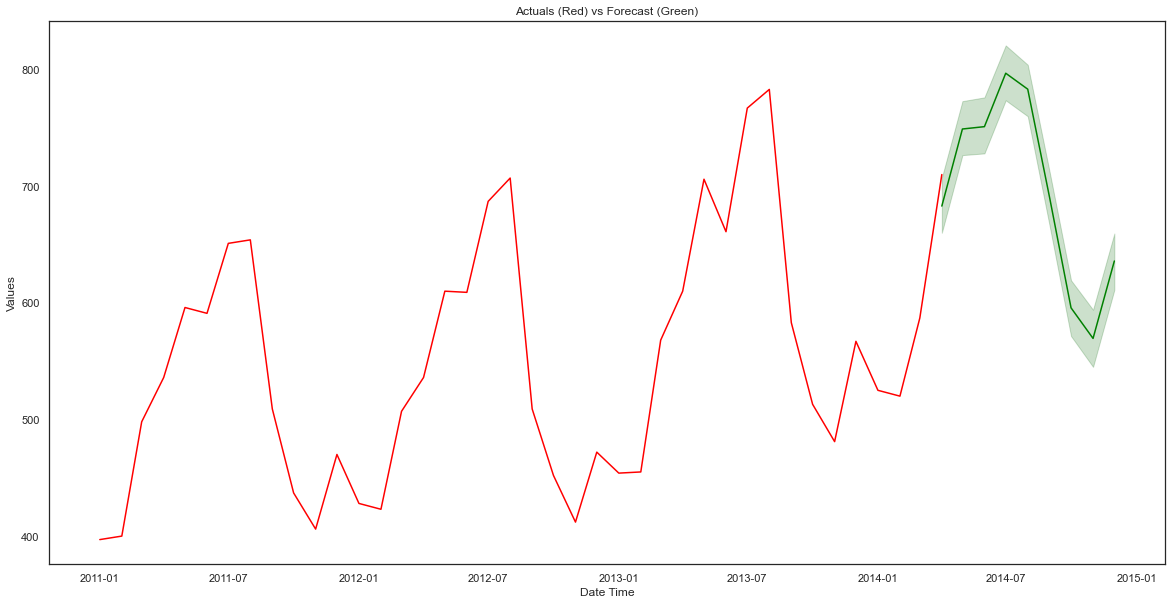

    RMSE = 27.02
    Std Deviation of Originals = 105.17
    Normalized RMSE = 26%

Running PyFlux Model...
Data Set split into train (32, 2) and test (8, 2) for Cross Validation Purposes
Cycling through various (p,d,q) parameters
................................
Best Params Selected (based on rmse): (2, 0, 3)


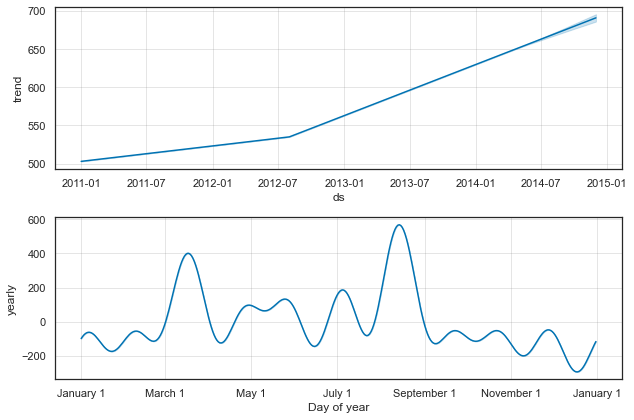

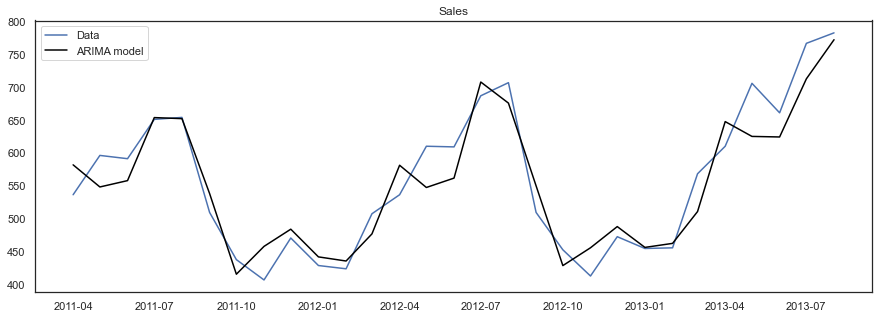

Normal ARIMA(2,0,3)                                                                                       
======================================================= ==================================================
Dependent Variable: Sales                               Method: MLE                                       
Start Date: 2011-04-01 00:00:00                         Log Likelihood: -147.3651                         
End Date: 2013-08-01 00:00:00                           AIC: 308.7302                                     
Number of observations: 29                              BIC: 318.3013                                     
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Constant                                 546.903    50.9623    10.7315  0.0      (447.0169 | 646.7891)    
AR(1)                                

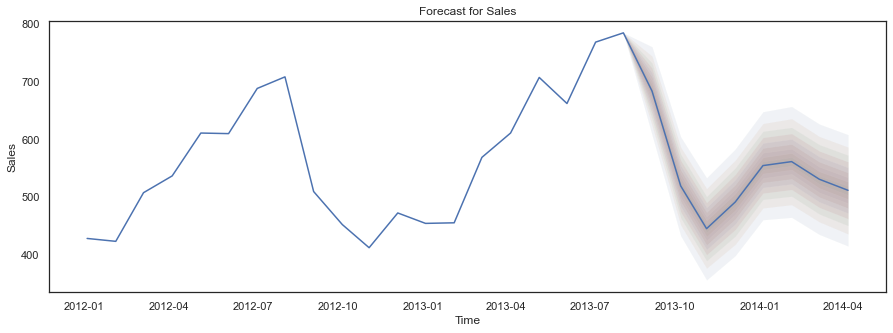

Dynamic 8-period Forecasts:
    RMSE = 88.24
    Std Deviation of Originals = 112.89
    Normalized RMSE = 78%

Running Non Seasonal ARIMA Model...
Data Set split into train (32,) and test (8,) for Cross Validation Purposes

Differencing = 0
 Iteration 0 completed...
 Iteration 10 completed...
    Best AR order p = 0, MA order q = 3, Interim metric = 364.113

Differencing = 1
 Iteration 20 completed...
 Iteration 30 completed...
    Best AR order p = 1, MA order q = 3, Interim metric = 355.132

Best model is: Non Seasonal ARIMA(1,1,3), aic = 355.132
####    Fitting best model for full data set now. Will take time... ######
Static Forecasts:
Dynamic predictions erroring but continuing...

Dynamic 8-period Forecasts:


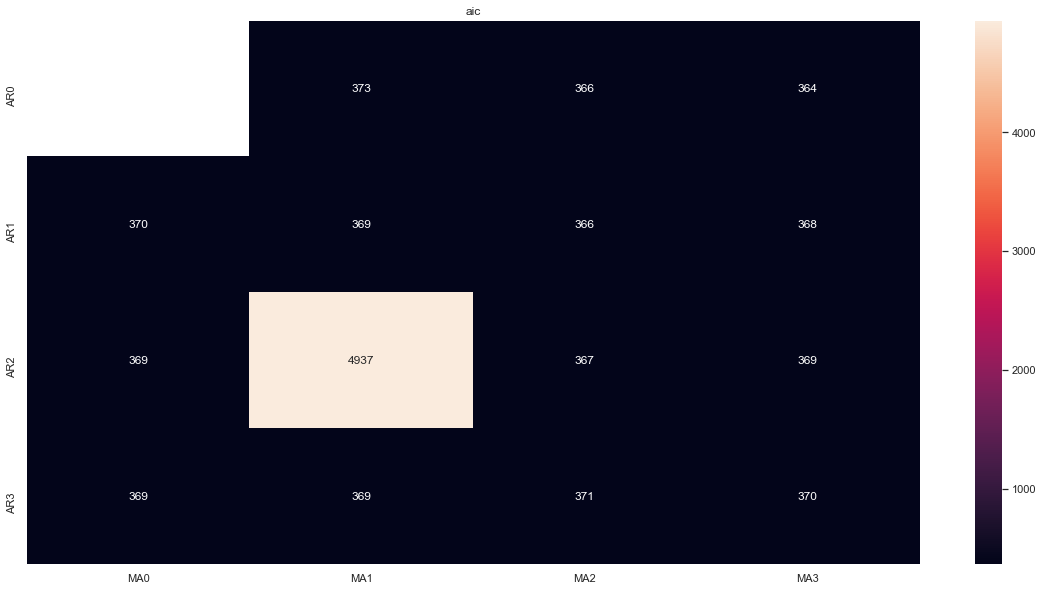

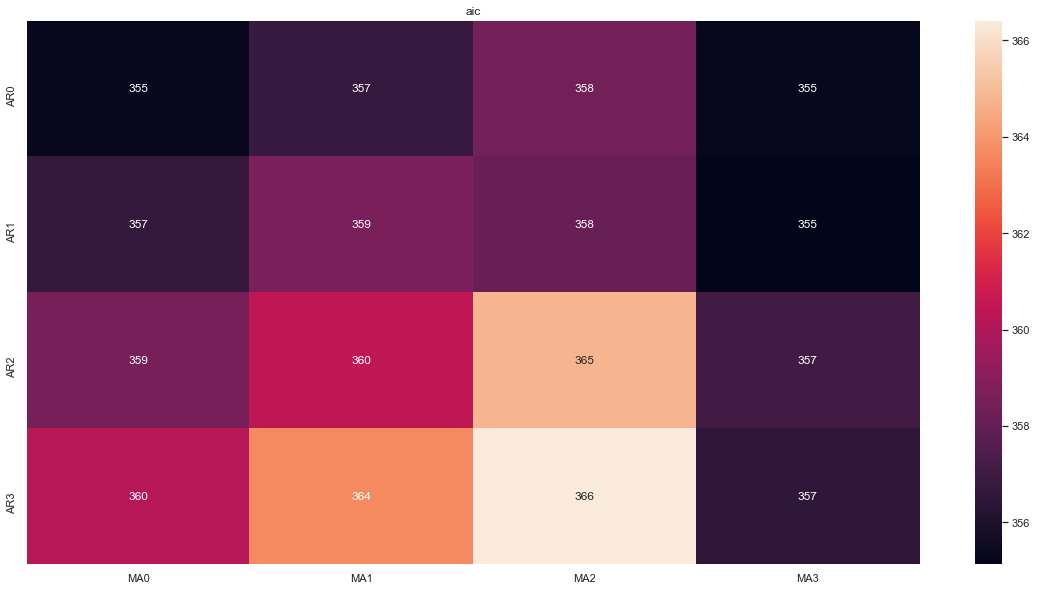

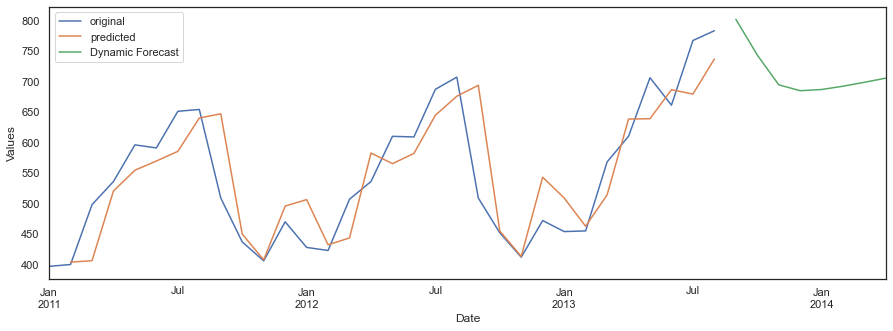

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   31
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -171.566
Method:                           mle   S.D. of innovations             57.754
Date:                Tue, 28 Apr 2020   AIC                            355.132
Time:                        09:46:59   BIC                            363.736
Sample:                    02-01-2011   HQIC                           357.936
                         - 08-01-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             6.8955      3.612      1.909      0.056      -0.184      13.975
ar.L1.D.Sales     0.2973      0.201      1.480      0.139      -0.096       0.691
ma.L1.D.Sales    -0.2077      0.161     

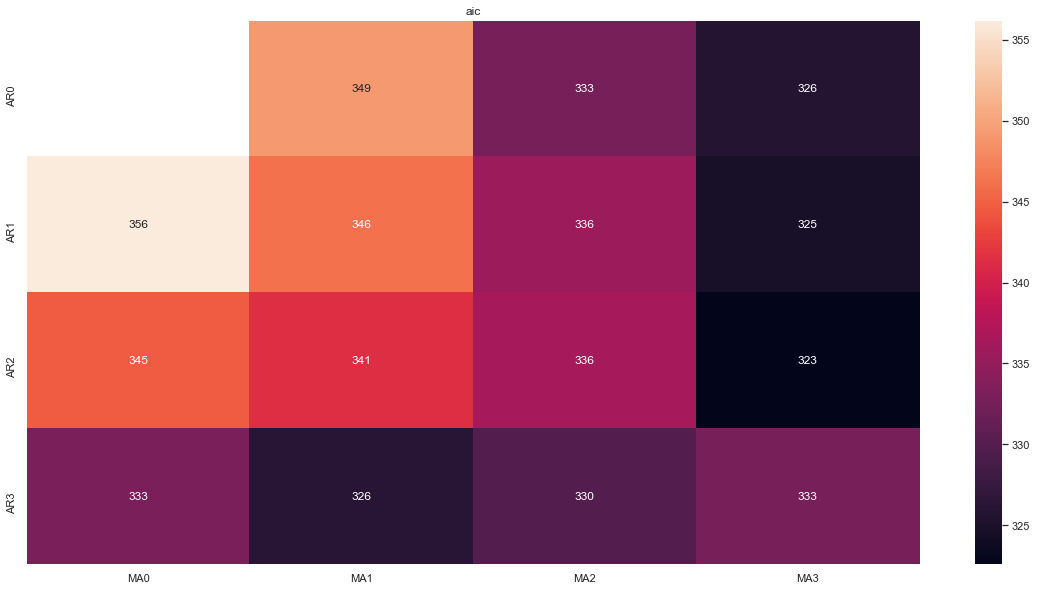

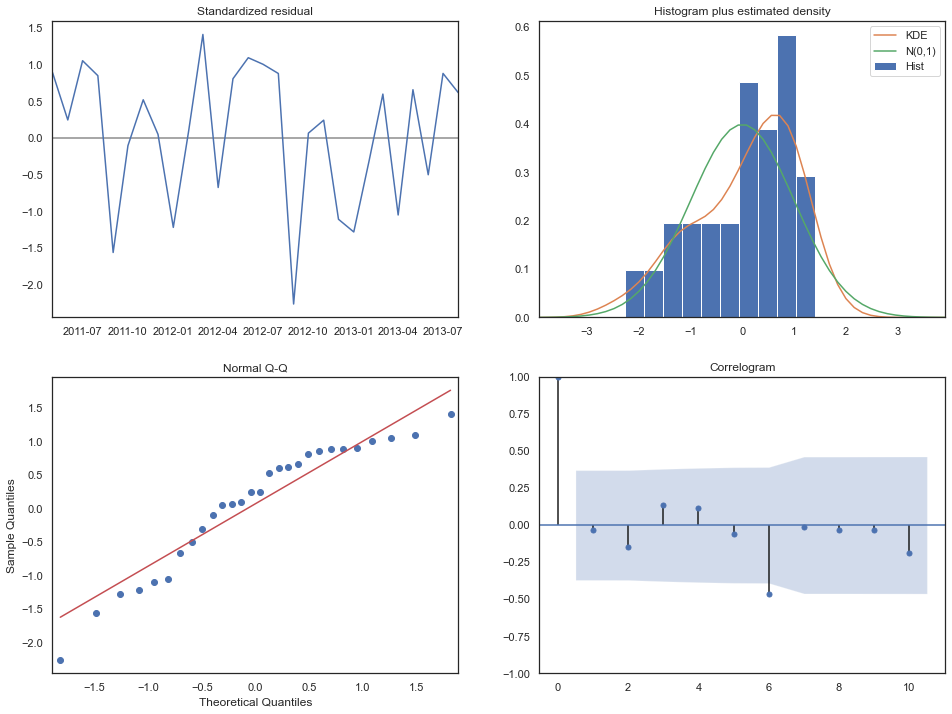

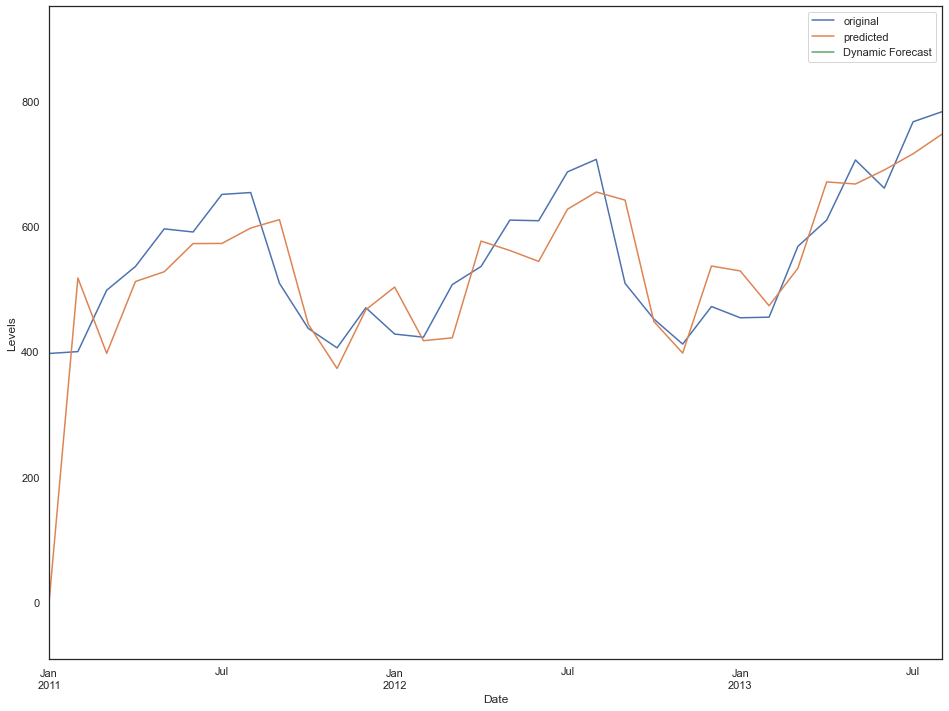

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   32
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -153.297
Date:                Tue, 28 Apr 2020   AIC                            322.594
Time:                        09:47:05   BIC                            333.252
Sample:                    01-01-2011   HQIC                           325.852
                         - 08-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     53.4904    108.355      0.494      0.622    -158.882     265.863
drift          1.8236      1.284      1.420      0.156      -0.694       4.341
ar.L1          1.1645      0.394      2.956      0.0

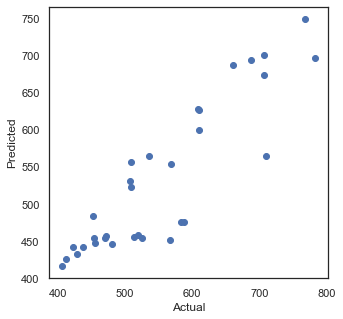

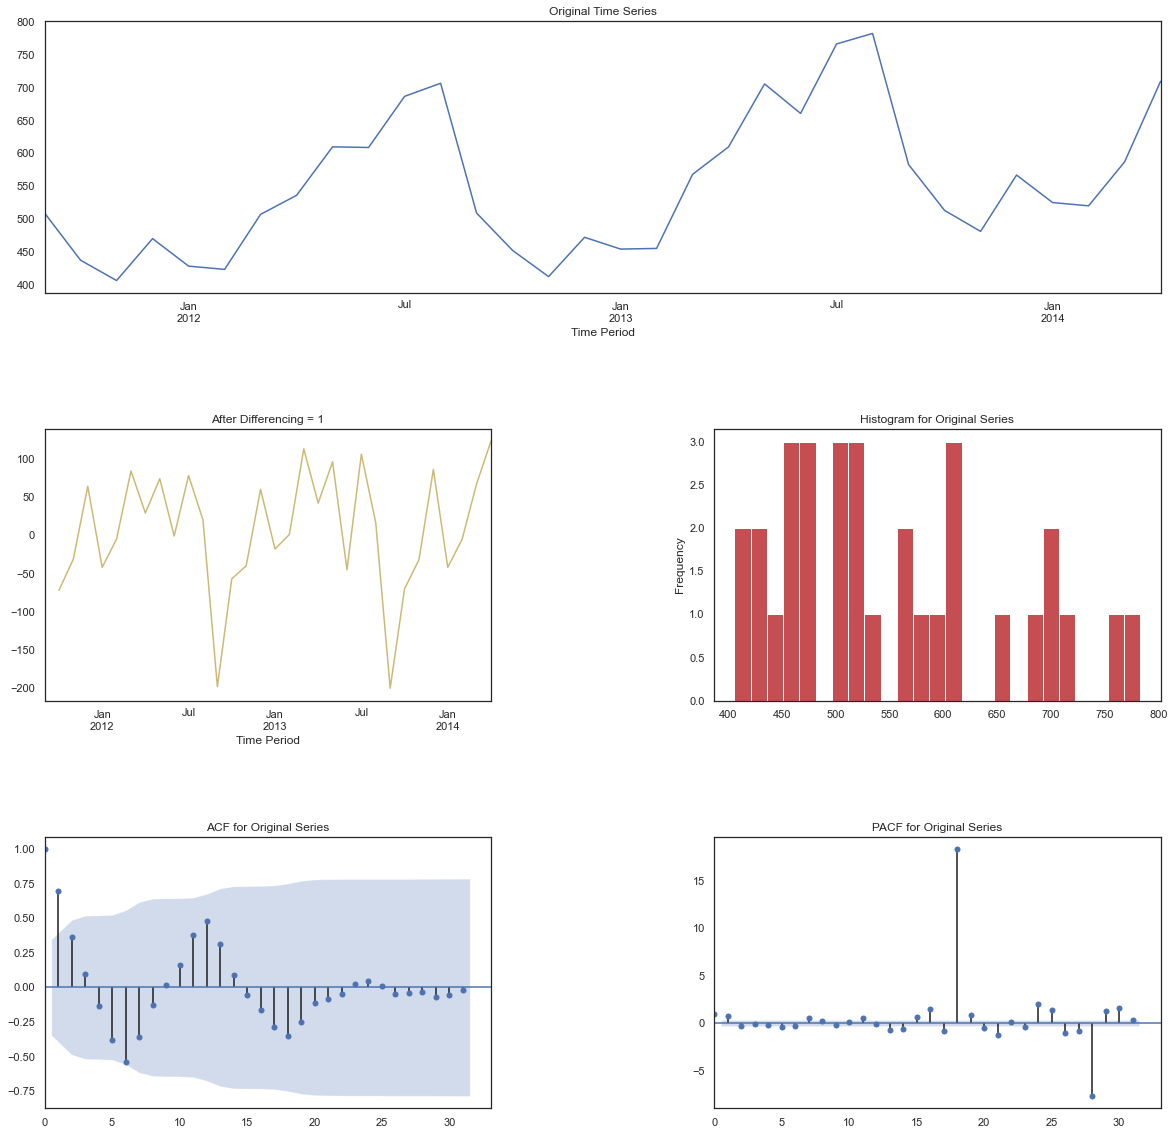


Best Model is:
    FB_Prophet
    Best Model Forecasts: [397.43339925 394.26439659 475.13958844 552.6507979  606.16646675
 593.8075334  660.50018932 660.71232185 507.50619756 428.91361953
 394.42161443 460.58144216 414.11758694 411.79132266 513.90684427
 548.4462694  625.04519239 601.9319964  692.72712711 713.80548107
 509.75235521 452.27189511 417.23839204 489.43689495 464.33627401
 463.76187059 554.96048001 607.84172026 680.80447863 665.27455071
 751.95124039 769.70735715 583.80971785 520.80175042 487.29601866
 558.92330507 527.98409147 528.04539112 615.77234059 682.98209188
 749.06129426 751.07731208 796.89239457 783.20675232 689.69823247
 595.71349456 569.48666597 635.88443919]
    Best Model Score: 27.02


In [13]:
ml_dict = AT.Auto_Timeseries(train, ts_column,
                            target, sep,  score_type='rmse', forecast_period=8,
                            time_interval='Month', non_seasonal_pdq=None, seasonality=False,
                            seasonal_period=12, seasonal_PDQ=None, model_type='best',
                            verbose=1)